In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import StrMethodFormatter
from pathlib import Path
%matplotlib inline
from itertools import combinations
from collections import Counter

In [2]:
data_dir = Path().resolve().parents[3] / 'data'
df = pd.read_csv(data_dir / "datasets/gov/vmi/verslo_liudijimai/VersloLiudijimas.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339176 entries, 0 to 339175
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   _type                            339176 non-null  object 
 1   _id                              339176 non-null  object 
 2   _revision                        339176 non-null  object 
 3   eiles_nr                         339176 non-null  int64  
 4   mm_kodas                         339176 non-null  object 
 5   registracija                     339176 non-null  object 
 6   metai                            339176 non-null  int64  
 7   grupe                            339176 non-null  int64  
 8   teritorija                       339176 non-null  int64  
 9   savivaldybe                      339176 non-null  int64  
 10  teritorija_kodas                 231672 non-null  float64
 11  rusies_kodas                     339176 non-null  int64  
 12  ru

In [4]:
df['registracija'] = pd.to_datetime(df['registracija'])
df['sprendimo_data'] = pd.to_datetime(df['sprendimo_data'])
df['data_nuo'] = pd.to_datetime(df['data_nuo'])
df['data_iki'] = pd.to_datetime(df['data_iki'])
df['veiklos_pabaiga'] = pd.to_datetime(df['veiklos_pabaiga'])
df['anuliavimo_data'] = pd.to_datetime(df['anuliavimo_data'])
df['veiklos_sav'] = df['veiklos_sav'].astype(str).replace('\.0', '', regex=True)
df['veiklos_vieta_veiksmas'] = df['veiklos_vieta_veiksmas'].astype(str).replace('\.0', '', regex=True)
df['teritorija_kodas'] = df['teritorija_kodas'].astype(str).replace('\.0', '', regex=True)
df['eiles_nr'] = df['eiles_nr'].astype(str)
df['grupe'] = df['grupe'].astype(str)
df['teritorija'] = df['teritorija'].astype(str)
df['savivaldybe'] = df['savivaldybe'].astype(str)
df['rusies_kodas'] = df['rusies_kodas'].astype(str)

In [5]:
df.nunique()

_type                                   1
_id                                339176
_revision                          339176
eiles_nr                           339176
mm_kodas                            90029
registracija                          440
metai                                   2
grupe                                   3
teritorija                              3
savivaldybe                            60
teritorija_kodas                       61
rusies_kodas                           86
rusis_pavadinimas                      86
evrk_klases                            74
data_nuo                              503
data_iki                              722
sprendimo_data                        440
veiklos_pabaiga                       440
anuliavimo_data                       228
nutraukimo_pozymis                      4
veiklos_vieta_veiksmas                  3
veiklos_sav                            61
anuliavimo_priezastis_aprasymas         1
veiklos_tipas                     

In [6]:
df.head().T

,0,1,2,3,4
_type,datasets/gov/vmi/verslo_liudijimai/VersloLiudi...,datasets/gov/vmi/verslo_liudijimai/VersloLiudi...,datasets/gov/vmi/verslo_liudijimai/VersloLiudi...,datasets/gov/vmi/verslo_liudijimai/VersloLiudi...,datasets/gov/vmi/verslo_liudijimai/VersloLiudi...
_id,9c47d996-d615-42b9-9653-9d420541ffed,1831db6b-66fe-456c-9c12-761ed0a151cd,6da4cd25-e61e-454b-b0a2-c70d2da2baef,fc177995-b59e-4797-aacd-4ad5097d6b60,52c5db46-57f9-4653-a05e-0d752c60852d
_revision,f3e882b4-abca-4d11-87d1-5c87569012c9,9858d20a-628a-44cc-8dd2-93267512ba43,01dd80eb-e93d-41f2-96a1-55b929486eb0,ba72626c-ff68-4c05-9d16-0db2c9b93f06,4124a02f-9e8f-4fe7-91fb-0db39244e58d
eiles_nr,50379,50380,50381,50394,50419
mm_kodas,665a3f6cfbaabf42891bd36ae4df2c547bc4ac3a60f530...,665a3f6cfbaabf42891bd36ae4df2c547bc4ac3a60f530...,5933b21f042285858dfb1a297126b3a7ea8e4cf6bea937...,08909666277c801b84c022d01fa27f1acad8e84d8d8faf...,c47e1b5ef9b49ae0578927d062ae7ec26fccef7ace45a8...
registracija,2020-12-07 00:00:00,2020-12-07 00:00:00,2020-12-07 00:00:00,2020-12-07 00:00:00,2020-12-07 00:00:00
metai,2021,2021,2021,2021,2021
grupe,2,2,2,2,2
teritorija,3,3,3,3,3
savivaldybe,19,19,21,52,1


In [19]:
# Sukuriami papildomi stulpeliai skaičiavimams
df['savaites_diena'] = df['registracija'].dt.dayofweek #išveda savaitės dieną, kada buvo registruotas verslo liūdijimas, čia 0 - pirmadinienis,..., 6 - sekmadienis
df['tarpas'] = abs(df['data_nuo'].dt.date - df['registracija'].dt.date) # išveda dienų skaičių, kurios praėjo nuo verslo liudijimo registarcijos datos iki jo įsigaliojimo pradžios 
df['laikotarpis'] = abs(df['data_iki'].dt.date - df['data_nuo'].dt.date) # išveda dienų skaičių, kurios praėjo nuo verslo liudijimo įsigaliojimo praždios iki pabaigas.

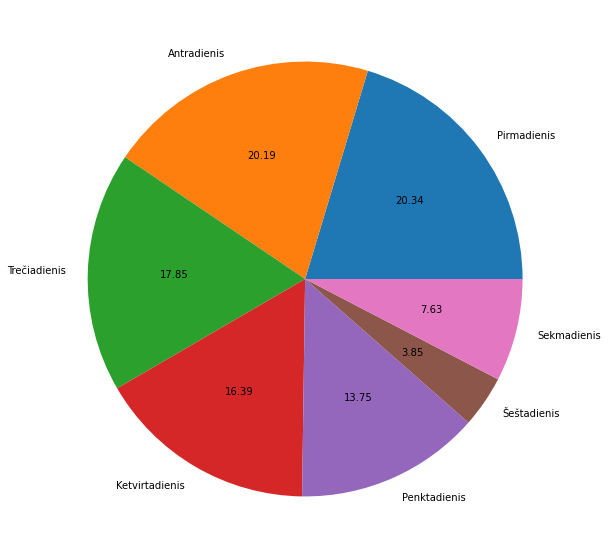

In [9]:
# Kurią savaitės dieną yra registruojama daugiausiai verslo liudijimų? 
labels = ('Pirmadienis', 'Antradienis', 'Trečiadienis', 'Ketvirtadienis', 'Penktadienis', 'Šeštadienis', 'Sekmadienis')
df.value_counts('savaites_diena').sort_index().plot.pie(autopct = '%.2f', figsize = (10,10), labels = labels)
plt.ylabel('')
plt.show()

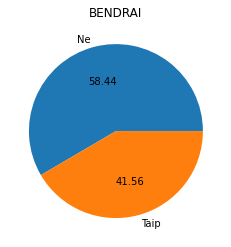

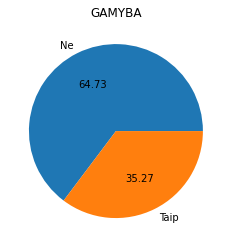

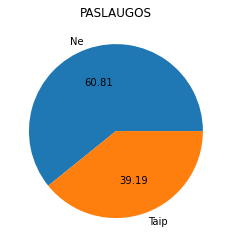

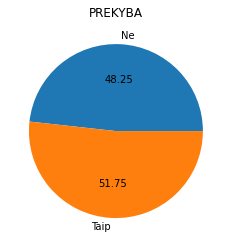

In [10]:
# Kokiai procentinei daliai yra taikomos lengvatos?
plt.figure(0)
df.value_counts('lengvata').sort_index().plot.pie(autopct='%.2f')
plt.ylabel('')
plt.title('BENDRAI')

# Kuri iš rūšių gauna daugiausiai lengvatų?
plt.figure(1)
df[df['grupe'] == '1'].value_counts('lengvata').sort_index().plot.pie(autopct='%.2f')
plt.ylabel('')
plt.title('GAMYBA')

plt.figure(2)
df[df['grupe'] == '2'].value_counts('lengvata').sort_index().plot.pie(autopct='%.2f')
plt.ylabel('')
plt.title('PASLAUGOS')

plt.figure(3)
df[df['grupe'] == '3'].value_counts('lengvata').sort_index().plot.pie(autopct='%.2f')
plt.ylabel('')
plt.title('PREKYBA')

plt.show()

<AxesSubplot:xlabel='tarpas'>

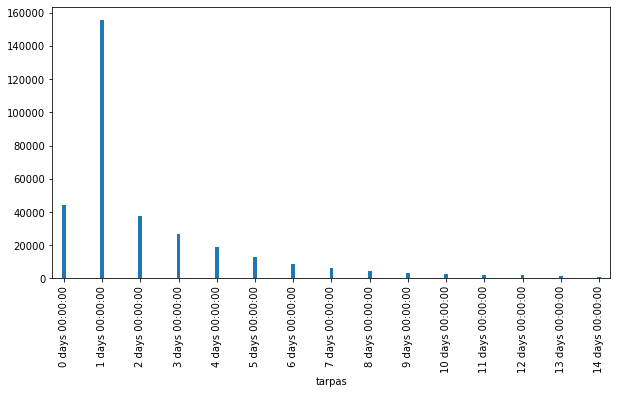

In [20]:
# Kiek (dažniausiai) praeina dienų nuo liudijimo registracijos datos iki jo įsigaliojimo pradžos?
savaite2 = df.value_counts('tarpas').sort_index().head(15)
savaite2.sort_index().plot.bar(width=0.1, figsize = (10,5))

In [12]:
# Koks dažniausias verslo liudijimo galiojimo laikotarpis?
df['laikotarpis'].median()

Timedelta('28 days 00:00:00')

In [13]:
# Kiek procentų verslo liudijmų nėra anuliuojami arba nutraukiami?
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'veiklos_pabaiga': df.columns,
                                 'percent_missing': percent_missing})
percent_missing.round(2).sort_values(ascending = False).head(4)

anuliavimo_priezastis_aprasymas    99.79
anuliavimo_data                    99.79
nutraukimo_pozymis                 98.63
veiklos_pabaiga                    98.63
dtype: float64

In [14]:
# Surandame visus kiekvieno mokesčių mokėtojo verslo liudijimus  
new = df[df['mm_kodas'].duplicated(keep = False)].sort_values('mm_kodas') # patikriname visas eilutes is mm_kodas stulpelio ir randam visas, kurios kartojasi
new['grouped'] = new.groupby('mm_kodas')['rusies_kodas'].transform(lambda x: ','.join(x)) # sugrupuojame pagal mm_kodas ir sujungiame visus rusies_kodas
new = new[['mm_kodas', 'grouped']].drop_duplicates() # pašaliname dublikatus
new

,mm_kodas,grouped
86968,000170c708cecf4a7a7722664d54531312a7177b3402fb...,"51,51,51"
98670,00045741d43cda311ffb2a44065f9e62cd208e8f87d15e...,"105,105"
197288,000786352cb8747f3eee0b97186a6d3787d3c20a8205f5...,"3,3,3,3,3,3,3"
145679,000822134edb7e17161a53ea82a0380e708cacc1cb22a5...,"31,31,31,31,31,31,31,31,31"
77611,000843ddb500a2c47dc2c9f4c4ace1926e0ae2bd1e7c62...,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
...,...,...
299568,fffe938dcb322816dcd2f6b901e2ed0312127d7849dfd1...,"102,102,102"
129103,fffec8d2acbcf7da2004b4a93beab3154041422961bb41...,"67,29"
331630,ffff24cf9619a8385e90aedd9aae731009af5122c7c92b...,"51,51"
160185,ffff2615e18772f33645e3caade443a00108586812514a...,"21,21,21,21"


In [15]:
# Kokios kombinacijos yra pačios rečiausios (įdomiausios) ?
count = Counter()
for row in new['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3))) 
n = 20
count.most_common()[:-n-1:-1]

[(('105', '18', '18'), 1),
 (('56', '82', '29'), 1),
 (('82', '56', '29'), 1),
 (('64', '81', '34'), 1),
 (('24', '33', '33'), 1),
 (('93', '29', '51'), 1),
 (('29', '93', '51'), 1),
 (('29', '93', '29'), 1),
 (('29', '51', '93'), 1),
 (('22', '48', '48'), 1),
 (('16', '51', '2'), 1),
 (('2', '16', '2'), 1),
 (('2', '16', '51'), 1),
 (('102', '18', '102'), 1),
 (('13', '67', '101'), 1),
 (('101', '13', '101'), 1),
 (('101', '13', '67'), 1),
 (('34', '67', '101'), 1),
 (('34', '13', '101'), 1),
 (('34', '13', '67'), 1)]

In [16]:
pd.options.display.max_colwidth = 500
df[df['rusies_kodas'] == '2']['rusis_pavadinimas'].drop_duplicates().to_frame()
df[df['rusies_kodas'] == '16']['rusis_pavadinimas'].drop_duplicates().to_frame()
df[df['rusies_kodas'] == '51']['rusis_pavadinimas'].drop_duplicates().to_frame()
# 2,16,51 
# Pavyzdys: tas pats mokesčių mokėtojas turi/turėjo verslo liudijimus (2. Medienos ruoša, malkų gamyba, medienos ruošos paslaugų veikla, įskaitant rąstų vežimą miške
# 16. Avalynės taisymas, 51. Gyvenamosios paskirties patalpų nuoma.

,rusis_pavadinimas
0,Gyvenamosios paskirties patalpų nuoma.
